# DeWatermark

In [ ]:
import cv2
import numpy as np
from math import log10
import matplotlib.pyplot as plt

In [ ]:
def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

def calculate_psnr(original, compared):
    mse_val = mse(original, compared)
    if mse_val == 0:
        return float('inf')
    return 20 * np.log10(255 / np.sqrt(mse_val))

In [8]:
def dewatermark(watermarked, watermark):
  r, g, b, a = cv2.split(watermark)
  a_st = np.stack([a, a, a, a], axis=-1)
  orig = (watermarked - (a_st * 0.3) * watermark) / (1 - a_st * 0.3)
  return orig


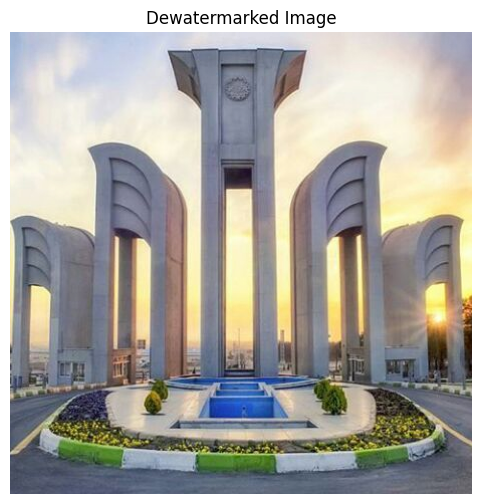

PSNR between dewatermarked and original: 89.88 dB


In [9]:
watermarked_path = "watermarked.png"
watermark_path = "iut.png"
original_path = "original.png"

watermarked = cv2.imread(watermarked_path).astype(np.float32) / 255.0
watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED).astype(np.float32) / 255.0
original = cv2.imread(original_path).astype(np.float32) / 255.0

watermarked = cv2.cvtColor(watermarked, cv2.COLOR_BGR2BGRA)
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2BGRA)
original = cv2.cvtColor(original, cv2.COLOR_BGR2BGRA)


dewatermarked = dewatermark(watermarked, watermark)
psnr_value = calculate_psnr(original, dewatermarked)


plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(dewatermarked, cv2.COLOR_BGR2RGB))
plt.title('Dewatermarked Image')
plt.axis('off')
plt.show()

print(f"PSNR between dewatermarked and original: {psnr_value:.2f} dB")